# PROYECTO ML SPOTIFY
## Cargamos datos

In [2]:
import pandas as pd
import numpy as np
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from spotipy.oauth2 import SpotifyClientCredentials # para el acceso

# guardo en variable para facilitar acceso y uso
clientID = '11f8b154e9c348d5935db01347721ac6'
clientSecret = '267327da62db45c99cb94de679956e11'

# Authentication
client_credential_manager = SpotifyClientCredentials(client_id=clientID, client_secret=clientSecret)
sp = spotipy.Spotify(client_credentials_manager=client_credential_manager)

In [3]:
df_songs = pd.read_csv("data/data_unique.csv")
df_songs

index              added_at album_type  \
0         0  2022-11-25T11:45:12Z     single   
1         1  2022-11-25T11:45:12Z      album   
2         2  2022-11-25T11:45:12Z      album   
3         3  2022-11-25T11:45:12Z     single   
4         4  2022-11-25T11:45:12Z     single   
...     ...                   ...        ...   
1462     43  2022-11-25T11:45:20Z     single   
1463     44  2022-11-25T11:45:20Z     single   
1464     45  2022-11-25T11:45:20Z     single   
1465     46  2022-11-25T11:45:20Z     single   
1466     48  2022-11-25T11:45:20Z      album   

                                          album_avb_mkt  \
0     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
2     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
3     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
4     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
...                                                 ...   
1462  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1463  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1464  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1465  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1466  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   

                                            album_image  \
0     https://i.scdn.co/image/ab67616d0000b273a935e4...   
1     https://i.scdn.co/image/ab67616d0000b273bb54dd...   
2     https://i.scdn.co/image/ab67616d0000b27302854a...   
3     https://i.scdn.co/image/ab67616d0000b273c9f744...   
4     https://i.scdn.co/image/ab67616d0000b273933c03...   
...                                                 ...   
1462  https://i.scdn.co/image/ab67616d0000b273584941...   
1463  https://i.scdn.co/image/ab67616d0000b2732a8efe...   
1464  https://i.scdn.co/image/ab67616d0000b273d39b6f...   
1465  https://i.scdn.co/image/ab67616d0000b27396dc8a...   
1466  https://i.scdn.co/image/ab67616d0000b273bdcbd2...   

                      album_name album_release_date  album_total_tracks  \
0      Unholy (feat. Kim Petras)         2022-09-22                   1   
1                      Midnights         2022-10-21                  13   
2                       Her Loss         2022-11-04                  16   
3                     La Bachata         2022-05-26                   1   
4                I'm Good (Blue)         2022-08-26                   2   
...                          ...                ...                 ...   
1462                   Thức Giấc         2021-07-14                   1   
1463                   Đi Về Nhà         2020-12-20                   1   
1464                     Mặt Mộc         2022-08-05                   1   
1465  Anh Đánh Rơi Người Yêu Này         2019-07-15                   1   
1466     girls like me don't cry         2022-10-06                   7   

                   artist_id            artist  ... valence  loudness  \
0     2wY79sveU1sp5g7SokKOiI         Sam Smith  ...   0.238    -7.384   
1     06HL4z0CvFAxyc27GXpf02      Taylor Swift  ...   0.533    -6.645   
2     3TVXtAsR1Inumwj472S9r4             Drake  ...   0.424    -9.390   
3     0tmwSHipWxN12fsoLcFU3B     Manuel Turizo  ...   0.850    -5.329   
4     1Cs0zKBU1kc0i8ypK3B9ai      David Guetta  ...   0.304    -3.673   
...                      ...               ...  ...     ...       ...   
1462  6zUWZmyi5MLOEynQ5wCI5f            Da LAB  ...   0.190    -8.591   
1463  1LEtM3AleYg1xabW6CRkpi               Đen  ...   0.486    -4.651   
1464  2Xlia1jlI7JDki4Xa42uyK  Phạm Nguyên Ngọc  ...   0.697    -4.894   
1465  0tBmmwc8j8zbJxISwdsvjA            Andiez  ...   0.304    -6.093   
1466  3R80OE4RViOWbnuvqh0j8a              thuy  ...   0.608    -5.713   

        tempo tempo_confidence time_signature  time_signature_confidence key  \
0     131.007            0.358              4                      1.000   2   
1      96.888            0.102              4                      1.000 

In [4]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1467 non-null   int64  
 1   added_at                   1467 non-null   object 
 2   album_type                 1467 non-null   object 
 3   album_avb_mkt              1467 non-null   object 
 4   album_image                1467 non-null   object 
 5   album_name                 1467 non-null   object 
 6   album_release_date         1467 non-null   object 
 7   album_total_tracks         1467 non-null   int64  
 8   artist_id                  1467 non-null   object 
 9   artist                     1467 non-null   object 
 10  available_mkt              1467 non-null   object 
 11  track_duration             1467 non-null   float64
 12  explicit                   1467 non-null   bool   
 13  track_id                   1467 non-null   objec

In [5]:
def data_report(df):
    
    ''' Esta función describe los campos de un df de pandas de forma bastante clara'''
    
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T #el .T da la vuelta al df

In [6]:
data_report(df_songs)

COL_N          index added_at album_type album_avb_mkt album_image album_name  \
DATA_TYPE      int64   object     object        object      object     object   
MISSINGS (%)     0.0      0.0        0.0           0.0         0.0        0.0   
UNIQUE_VALUES     50       13          3            68        1193       1179   
CARDIN (%)      3.41     0.89        0.2          4.64       81.32      80.37   

COL_N         album_release_date album_total_tracks artist_id  artist  ...  \
DATA_TYPE                 object              int64    object  object  ...   
MISSINGS (%)                 0.0                0.0       0.0     0.0  ...   
UNIQUE_VALUES                464                 37       914     914  ...   
CARDIN (%)                 31.63               2.52      62.3    62.3  ...   

COL_N          valence loudness    tempo tempo_confidence time_signature  \
DATA_TYPE      float64  float64  float64          float64          int64   
MISSINGS (%)       0.0      0.0      0.0              0.0            0.0   
UNIQUE_VALUES      708     1341     1404              740              4   
CARDIN (%)       48.26    91.41    95.71            50.44           0.27   

COL_N         time_signature_confidence    key key_confidence   mode  \
DATA_TYPE                       float64  int64        float64  int64   
MISSINGS (%)                        0.0    0.0            0.0    0.0   
UNIQUE_VALUES                       293     12            656      2   
CARDIN (%)                        19.97   0.82          44.72   0.14   

COL_N         mode_confidence  
DATA_TYPE             float64  
MISSINGS (%)              0.0  
UNIQUE_VALUES             578  
CARDIN (%)               39.4  

[4 rows x 34 columns]

Escojo las cols que me van a aportar info útil para mi modelo:  
- album_type ?¿  
- track_duration  
- explicit  
- track_name (esto es lo que tengo que ver si merece la pena ahcer NLP)
    * Añadir letra??  
- popularity ¿?  
- country ¿?  
- danceability  
- energy  
- speechiness  
- acousticness  
- instrumentalness  
- liveness  
- valence  
- loudness  
- tempo  
- time_signature  
- key  
- mode  

Las escalas son muy diferentes. ¿Debería escalar para los modelos que lo nacesitan?

#### INTENTO SACAR GÉNEROS

In [7]:
artist_genres = []
artist_followers = []

for a_id in df_songs.artist_id:
    artist = sp.artist(a_id)
    artist_genres.append(artist['genres'])
    artist_followers.append(artist['followers']['total'])

In [8]:
artist_genres

[['pop', 'uk pop'],
 ['pop'],
 ['canadian hip hop', 'canadian pop', 'hip hop', 'rap', 'toronto rap'],
 ['colombian pop',
  'latin pop',
  'reggaeton',
  'reggaeton colombiano',
  'urbano latino'],
 ['big room', 'dance pop', 'edm', 'pop', 'pop dance'],
 ['pop'],
 ['argentine hip hop',
  'pop venezolano',
  'trap argentino',
  'trap latino',
  'urbano latino'],
 ['dance pop', 'hip pop', 'pop'],
 ['dance pop', 'r&b'],
 ['reggaeton', 'trap latino', 'urbano latino'],
 ['alternative hip hop'],
 ['piano rock', 'pop'],
 ['reggaeton', 'trap latino', 'urbano latino'],
 ['puerto rican pop', 'reggaeton', 'trap latino', 'urbano latino'],
 ['chill pop', 'pop'],
 ['k-pop'],
 ['argentine hip hop',
  'pop venezolano',
  'trap argentino',
  'trap latino',
  'urbano latino'],
 ['dance pop', 'urban contemporary'],
 ['afrofuturism'],
 ['r&b en espanol'],
 ['pop'],
 ['pop'],
 ['gen z singer-songwriter', 'pop'],
 ['reggaeton', 'trap latino', 'urbano latino'],
 ['nigerian pop'],
 ['detroit hip hop', 'hip hop'

In [9]:
df_songs = df_songs.assign(artist_genres=artist_genres, artist_followers=artist_followers)
df_songs

index              added_at album_type  \
0         0  2022-11-25T11:45:12Z     single   
1         1  2022-11-25T11:45:12Z      album   
2         2  2022-11-25T11:45:12Z      album   
3         3  2022-11-25T11:45:12Z     single   
4         4  2022-11-25T11:45:12Z     single   
...     ...                   ...        ...   
1462     43  2022-11-25T11:45:20Z     single   
1463     44  2022-11-25T11:45:20Z     single   
1464     45  2022-11-25T11:45:20Z     single   
1465     46  2022-11-25T11:45:20Z     single   
1466     48  2022-11-25T11:45:20Z      album   

                                          album_avb_mkt  \
0     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
2     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
3     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
4     ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
...                                                 ...   
1462  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1463  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1464  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1465  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   
1466  ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...   

                                            album_image  \
0     https://i.scdn.co/image/ab67616d0000b273a935e4...   
1     https://i.scdn.co/image/ab67616d0000b273bb54dd...   
2     https://i.scdn.co/image/ab67616d0000b27302854a...   
3     https://i.scdn.co/image/ab67616d0000b273c9f744...   
4     https://i.scdn.co/image/ab67616d0000b273933c03...   
...                                                 ...   
1462  https://i.scdn.co/image/ab67616d0000b273584941...   
1463  https://i.scdn.co/image/ab67616d0000b2732a8efe...   
1464  https://i.scdn.co/image/ab67616d0000b273d39b6f...   
1465  https://i.scdn.co/image/ab67616d0000b27396dc8a...   
1466  https://i.scdn.co/image/ab67616d0000b273bdcbd2...   

                      album_name album_release_date  album_total_tracks  \
0      Unholy (feat. Kim Petras)         2022-09-22                   1   
1                      Midnights         2022-10-21                  13   
2                       Her Loss         2022-11-04                  16   
3                     La Bachata         2022-05-26                   1   
4                I'm Good (Blue)         2022-08-26                   2   
...                          ...                ...                 ...   
1462                   Thức Giấc         2021-07-14                   1   
1463                   Đi Về Nhà         2020-12-20                   1   
1464                     Mặt Mộc         2022-08-05                   1   
1465  Anh Đánh Rơi Người Yêu Này         2019-07-15                   1   
1466     girls like me don't cry         2022-10-06                   7   

                   artist_id            artist  ...    tempo  \
0     2wY79sveU1sp5g7SokKOiI         Sam Smith  ...  131.007   
1     06HL4z0CvFAxyc27GXpf02      Taylor Swift  ...   96.888   
2     3TVXtAsR1Inumwj472S9r4             Drake  ...  160.070   
3     0tmwSHipWxN12fsoLcFU3B     Manuel Turizo  ...  124.980   
4     1Cs0zKBU1kc0i8ypK3B9ai      David Guetta  ...  128.040   
...                      ...               ...  ...      ...   
1462  6zUWZmyi5MLOEynQ5wCI5f            Da LAB  ...  127.092   
1463  1LEtM3AleYg1xabW6CRkpi               Đen  ...   84.006   
1464  2Xlia1jlI7JDki4Xa42uyK  Phạm Nguyên Ngọc  ...  167.979   
1465  0tBmmwc8j8zbJxISwdsvjA            Andiez  ...  170.205   
1466  3R80OE4RViOWbnuvqh0j8a              thuy  ...  109.987   

      tempo_confidence  time_signature time_signature_confidence key  \
0                0.358               4                     1.000   2   
1                0.102               4                     1.000   4   
2                0.204               4                     0.954   4   
3                0.877               4               

In [18]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1467 non-null   int64  
 1   added_at                   1467 non-null   object 
 2   album_type                 1467 non-null   object 
 3   album_avb_mkt              1467 non-null   object 
 4   album_image                1467 non-null   object 
 5   album_name                 1467 non-null   object 
 6   album_release_date         1467 non-null   object 
 7   album_total_tracks         1467 non-null   int64  
 8   artist_id                  1467 non-null   object 
 9   artist                     1467 non-null   object 
 10  available_mkt              1467 non-null   object 
 11  track_duration             1467 non-null   float64
 12  explicit                   1467 non-null   bool   
 13  track_id                   1467 non-null   objec

In [4]:
sns.countplot(x=["explicit"].bool(), data=df_pre, palette='Set2');
plt.show() #podría pasarlo a 0 y 1 para pintarlo. Ahora no

AttributeError: 'list' object has no attribute 'bool'

## Transformación de las variables

In [20]:
df_pre = df_songs[["album_type","album_name","artist","track_duration","explicit","track_name","popularity",
                  "danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence",
                  "loudness","tempo","key","mode","artist_genres","artist_followers"]]
df_pre

album_type                  album_name            artist  track_duration  \
0        single   Unholy (feat. Kim Petras)         Sam Smith         156.943   
1         album                   Midnights      Taylor Swift         200.690   
2         album                    Her Loss             Drake         239.359   
3        single                  La Bachata     Manuel Turizo         162.637   
4        single             I'm Good (Blue)      David Guetta         175.238   
...         ...                         ...               ...             ...   
1462     single                   Thức Giấc            Da LAB         269.021   
1463     single                   Đi Về Nhà               Đen         200.000   
1464     single                     Mặt Mộc  Phạm Nguyên Ngọc         214.293   
1465     single  Anh Đánh Rơi Người Yêu Này            Andiez         217.729   
1466      album     girls like me don't cry              thuy         213.640   

      explicit                  track_name  popularity  danceability  energy  \
0        False   Unholy (feat. Kim Petras)         100         0.714   0.472   
1        False                   Anti-Hero          97         0.637   0.643   
2         True                   Rich Flex          95         0.561   0.520   
3        False                  La Bachata          97         0.835   0.679   
4         True             I'm Good (Blue)          97         0.561   0.965   
...        ...                         ...         ...           ...     ...   
1462     False                   Thức Giấc          59         0.660   0.578   
1463     False                   Đi Về Nhà          59         0.742   0.662   
1464     False                     Mặt Mộc          59         0.599   0.727   
1465     False  Anh Đánh Rơi Người Yêu Này          56         0.534   0.752   
1466     False     girls like me don't cry          63         0.871   0.372   

      speechiness  acousticness  instrumentalness  liveness  valence  \
0          0.0864       0.01300          0.000005    0.2660    0.238   
1          0.0519       0.13000          0.000002    0.1420    0.533   
2          0.2440       0.05030          0.000002    0.3550    0.424   
3          0.0364       0.58300          0.000002    0.2180    0.850   
4          0.0343       0.00383          0.000007    0.3710    0.304   
...           ...           ...               ...       ...      ...   
1462       0.0306       0.45000          0.000089    0.1030    0.190   
1463       0.0647       0.57800          0.000000    0.1260    0.486   
1464       0.0783       0.66800          0.000026    0.1020    0.697   
1465       0.1000       0.60800          0.000006    0.0842    0.304   
1466       0.0413       0.25300          0.000002    0.1040    0.608   

      loudness    tempo  key  mode  \
0       -7.384  131.007    2     1   
1       -6.645   96.888    4     1   
2       -9.390  160.070    4     0   
3       -5.329  124.980    7     0   
4       -3.673  128.040    7     0   
...        ...      ...  ...   ...   
1462    -8.591  127.092    9     1   
1463    -4.651   84.006    5     1   
1464    -4.894  167.979    4     1   
1465    -6.093  170.205    4     1   
1466    -5.713  109.987    0     0   

                                          artist_genres  artist_followers  
0                                         [pop, uk pop]          21843485  
1                                                 [pop]          68253710  
2     [canadian hip hop, canadian pop, hip hop, rap,...          72127776  
3     [colombian pop, latin pop, reggaeton, reggaeto...          11522601  
4            [big room, dance pop, edm, pop, pop dance]          25545911  
...                                                 ...               ...  
1462            [indie viet, v-pop, vietnamese hip hop]            835904  
1463  [indie viet, v-pop, vietnamese hip hop, vietna...           2990388  
1464              [v-pop, vietnamese singer-songwriter]          

In [24]:
df_procesado = df_pre[["album_type","album_name","artist","track_duration","explicit","track_name","popularity",
                  "danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence",
                  "loudness","tempo","key","mode","artist_genres","artist_followers"]]
df_procesado

album_type                  album_name            artist  track_duration  \
0        single   Unholy (feat. Kim Petras)         Sam Smith         156.943   
1         album                   Midnights      Taylor Swift         200.690   
2         album                    Her Loss             Drake         239.359   
3        single                  La Bachata     Manuel Turizo         162.637   
4        single             I'm Good (Blue)      David Guetta         175.238   
...         ...                         ...               ...             ...   
1462     single                   Thức Giấc            Da LAB         269.021   
1463     single                   Đi Về Nhà               Đen         200.000   
1464     single                     Mặt Mộc  Phạm Nguyên Ngọc         214.293   
1465     single  Anh Đánh Rơi Người Yêu Này            Andiez         217.729   
1466      album     girls like me don't cry              thuy         213.640   

      explicit                  track_name  popularity  danceability  energy  \
0        False   Unholy (feat. Kim Petras)         100         0.714   0.472   
1        False                   Anti-Hero          97         0.637   0.643   
2         True                   Rich Flex          95         0.561   0.520   
3        False                  La Bachata          97         0.835   0.679   
4         True             I'm Good (Blue)          97         0.561   0.965   
...        ...                         ...         ...           ...     ...   
1462     False                   Thức Giấc          59         0.660   0.578   
1463     False                   Đi Về Nhà          59         0.742   0.662   
1464     False                     Mặt Mộc          59         0.599   0.727   
1465     False  Anh Đánh Rơi Người Yêu Này          56         0.534   0.752   
1466     False     girls like me don't cry          63         0.871   0.372   

      speechiness  acousticness  instrumentalness  liveness  valence  \
0          0.0864       0.01300          0.000005    0.2660    0.238   
1          0.0519       0.13000          0.000002    0.1420    0.533   
2          0.2440       0.05030          0.000002    0.3550    0.424   
3          0.0364       0.58300          0.000002    0.2180    0.850   
4          0.0343       0.00383          0.000007    0.3710    0.304   
...           ...           ...               ...       ...      ...   
1462       0.0306       0.45000          0.000089    0.1030    0.190   
1463       0.0647       0.57800          0.000000    0.1260    0.486   
1464       0.0783       0.66800          0.000026    0.1020    0.697   
1465       0.1000       0.60800          0.000006    0.0842    0.304   
1466       0.0413       0.25300          0.000002    0.1040    0.608   

      loudness    tempo  key  mode  \
0       -7.384  131.007    2     1   
1       -6.645   96.888    4     1   
2       -9.390  160.070    4     0   
3       -5.329  124.980    7     0   
4       -3.673  128.040    7     0   
...        ...      ...  ...   ...   
1462    -8.591  127.092    9     1   
1463    -4.651   84.006    5     1   
1464    -4.894  167.979    4     1   
1465    -6.093  170.205    4     1   
1466    -5.713  109.987    0     0   

                                          artist_genres  artist_followers  
0                                         [pop, uk pop]          21843485  
1                                                 [pop]          68253710  
2     [canadian hip hop, canadian pop, hip hop, rap,...          72127776  
3     [colombian pop, latin pop, reggaeton, reggaeto...          11522601  
4            [big room, dance pop, edm, pop, pop dance]          25545911  
...                                                 ...               ...  
1462            [indie viet, v-pop, vietnamese hip hop]            835904  
1463  [indie viet, v-pop, vietnamese hip hop, vietna...           2990388  
1464              [v-pop, vietnamese singer-songwriter]          

In [38]:
df_procesado["artist_genres"][0].unique()

AttributeError: 'list' object has no attribute 'unique'

In [5]:
# Tratamos col album_type
df_procesado = pd.get_dummies(df_procesado, columns = ["album_type"], prefix = ["al_type"])

NameError: name 'df_procesado' is not defined

In [32]:
# Eliminamos una de las cols (por correlación)
df_procesado.drop(columns=("al_type_compilation"),axis=1, inplace=True)

In [34]:
# Tratamos col explicit
df_procesado = pd.get_dummies(df_procesado, columns = ["explicit"], prefix = ["exp"])

In [35]:
df_procesado

album_name            artist  track_duration  \
0      Unholy (feat. Kim Petras)         Sam Smith         156.943   
1                      Midnights      Taylor Swift         200.690   
2                       Her Loss             Drake         239.359   
3                     La Bachata     Manuel Turizo         162.637   
4                I'm Good (Blue)      David Guetta         175.238   
...                          ...               ...             ...   
1462                   Thức Giấc            Da LAB         269.021   
1463                   Đi Về Nhà               Đen         200.000   
1464                     Mặt Mộc  Phạm Nguyên Ngọc         214.293   
1465  Anh Đánh Rơi Người Yêu Này            Andiez         217.729   
1466     girls like me don't cry              thuy         213.640   

                      track_name  popularity  danceability  energy  \
0      Unholy (feat. Kim Petras)         100         0.714   0.472   
1                      Anti-Hero          97         0.637   0.643   
2                      Rich Flex          95         0.561   0.520   
3                     La Bachata          97         0.835   0.679   
4                I'm Good (Blue)          97         0.561   0.965   
...                          ...         ...           ...     ...   
1462                   Thức Giấc          59         0.660   0.578   
1463                   Đi Về Nhà          59         0.742   0.662   
1464                     Mặt Mộc          59         0.599   0.727   
1465  Anh Đánh Rơi Người Yêu Này          56         0.534   0.752   
1466     girls like me don't cry          63         0.871   0.372   

      speechiness  acousticness  instrumentalness  ...  loudness    tempo  \
0          0.0864       0.01300          0.000005  ...    -7.384  131.007   
1          0.0519       0.13000          0.000002  ...    -6.645   96.888   
2          0.2440       0.05030          0.000002  ...    -9.390  160.070   
3          0.0364       0.58300          0.000002  ...    -5.329  124.980   
4          0.0343       0.00383          0.000007  ...    -3.673  128.040   
...           ...           ...               ...  ...       ...      ...   
1462       0.0306       0.45000          0.000089  ...    -8.591  127.092   
1463       0.0647       0.57800          0.000000  ...    -4.651   84.006   
1464       0.0783       0.66800          0.000026  ...    -4.894  167.979   
1465       0.1000       0.60800          0.000006  ...    -6.093  170.205   
1466       0.0413       0.25300          0.000002  ...    -5.713  109.987   

      key  mode                                      artist_genres  \
0       2     1                                      [pop, uk pop]   
1       4     1                                              [pop]   
2       4     0  [canadian hip hop, canadian pop, hip hop, rap,...   
3       7     0  [colombian pop, latin pop, reggaeton, reggaeto...   
4       7     0         [big room, dance pop, edm, pop, pop dance]   
...   ...   ...                                                ...   
1462    9     1            [indie viet, v-pop, vietnamese hip hop]   
1463    5     1  [indie viet, v-pop, vietnamese hip hop, vietna...   
1464    4     1              [v-pop, vietnamese singer-songwriter]   
1465    4     1              [v-pop, vietnamese singer-songwriter]   
1466    0     0                        [chill r&b, indie r&b, pop]   

      artist_followers al_type_album  al_type_single  exp_False  exp_True  
0             21843485             0               1          1         0  
1             68253710             1               0          1         0  
2             72127776             1               0          0         1  
3             11522601             0               1          1         0  
4             25545911             0               1          0         1  
...                ...           ...             ...        ...       ...  
1462            835904             0      

In [39]:
df_procesado["track_name"] # cómo lo trato?

0        Unholy (feat. Kim Petras)
1                        Anti-Hero
2                        Rich Flex
3                       La Bachata
4                  I'm Good (Blue)
                   ...            
1462                     Thức Giấc
1463                     Đi Về Nhà
1464                       Mặt Mộc
1465    Anh Đánh Rơi Người Yêu Này
1466       girls like me don't cry
Name: track_name, Length: 1467, dtype: object

In [ ]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")

Para elegir qué etieuqetas le pongo, ML no supervisado (K-means?, PCA?). Una vez que las tengo, le hago ML de random forest o xgboost

## Coprobamos distribución variables
Vemos cómo están distribuidas, así como la correlación que existe entre ellas (esto con las etiquetas???).  
Hay que también valorar la estandarización de las mismas, las escalas son muy diferentes.

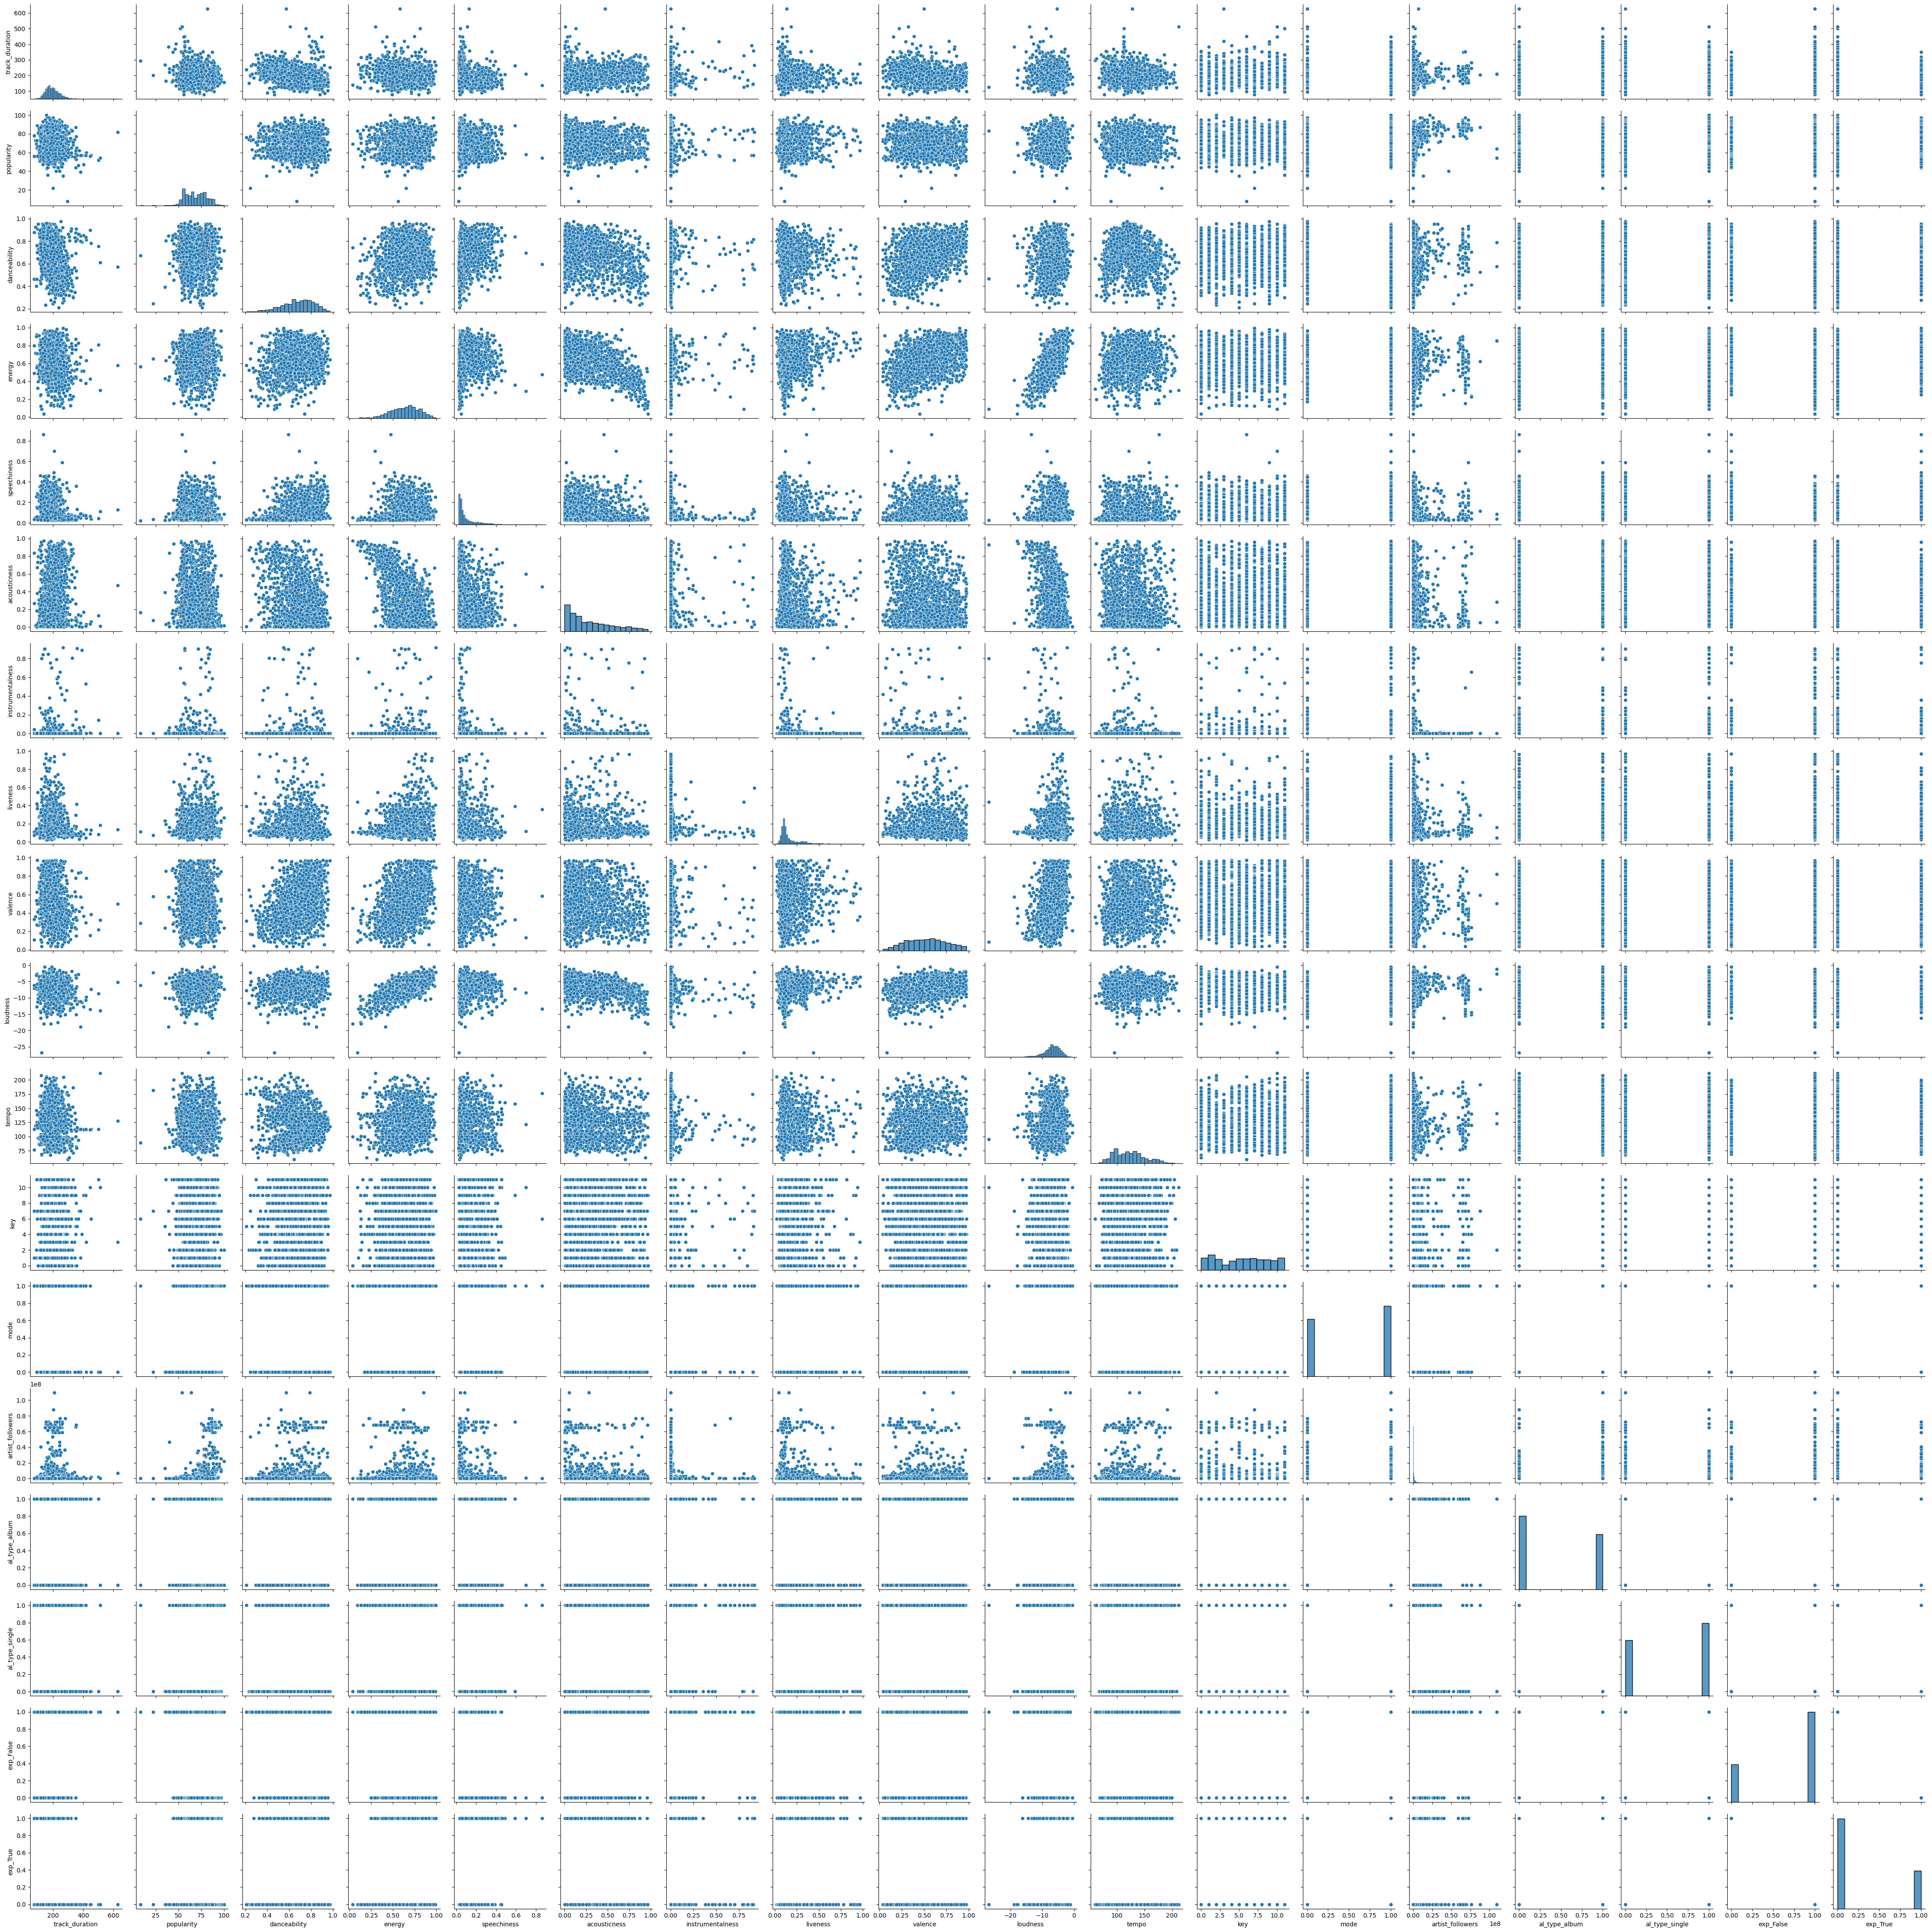

In [41]:
sns.pairplot(df_procesado); #evidentemente, no se ve ná. Jaime y la lupa xd

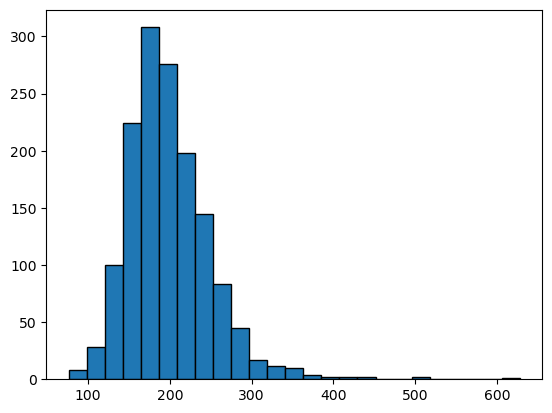

In [50]:
plt.hist(df_procesado["track_duration"], edgecolor="black", bins=25);
plt.show()

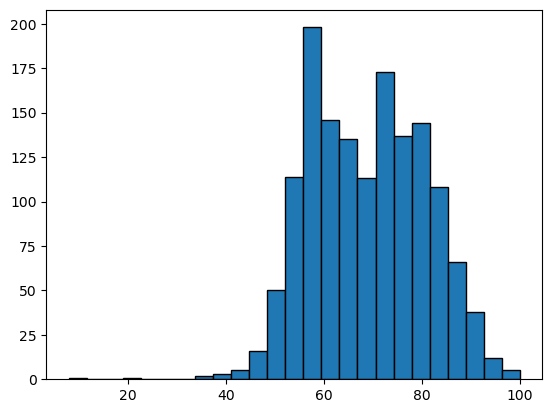

In [51]:
plt.hist(df_procesado["popularity"], edgecolor="black", bins=25);
plt.show()

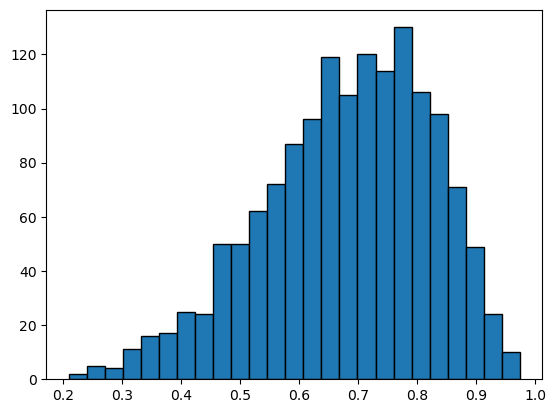

In [52]:
plt.hist(df_procesado["danceability"], edgecolor="black", bins=25);
plt.show()

In [53]:
df_procesado.columns

Index(['album_name', 'artist', 'track_duration', 'track_name', 'popularity',
       'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'key',
       'mode', 'artist_genres', 'artist_followers', 'al_type_album',
       'al_type_single', 'exp_False', 'exp_True'],
      dtype='object')

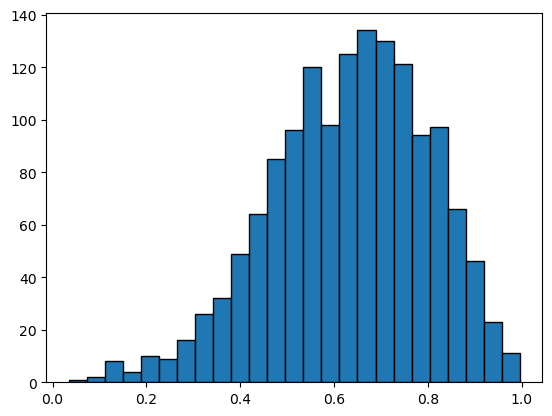

In [54]:
plt.hist(df_procesado["energy"], edgecolor="black", bins=25);
plt.show()

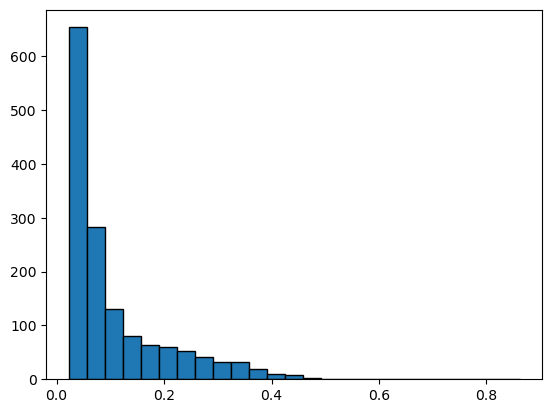

In [55]:
plt.hist(df_procesado["speechiness"], edgecolor="black", bins=25);
plt.show()

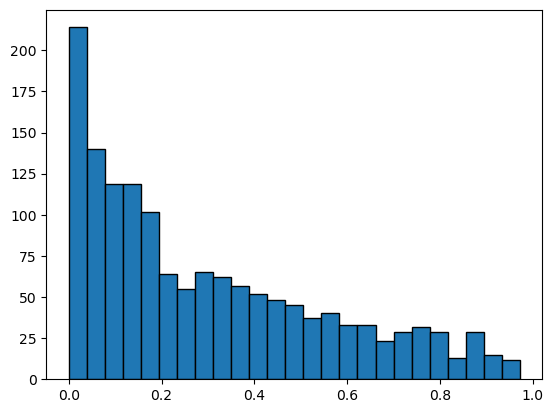

In [56]:
plt.hist(df_procesado["acousticness"], edgecolor="black", bins=25);
plt.show()

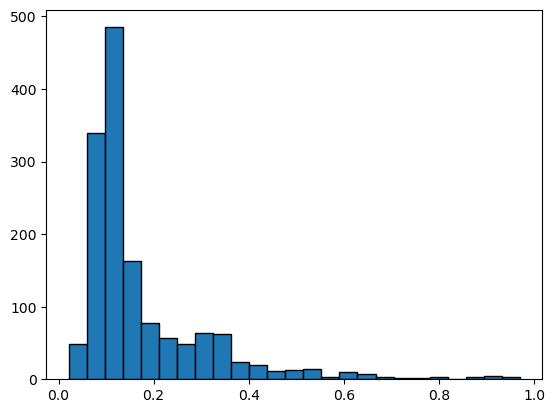

In [57]:
plt.hist(df_procesado["liveness"], edgecolor="black", bins=25);
plt.show()

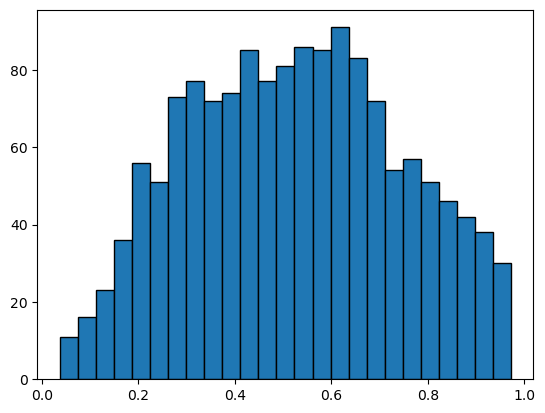

In [58]:
plt.hist(df_procesado["valence"], edgecolor="black", bins=25);
plt.show()

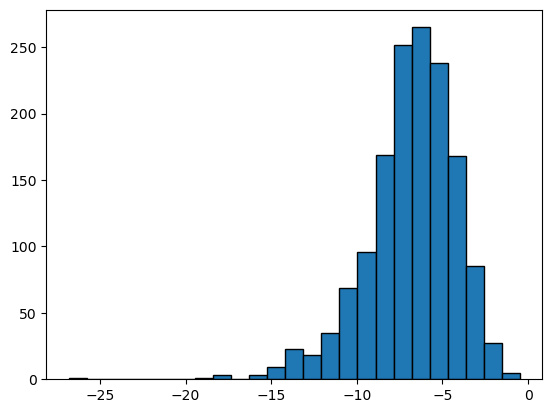

In [59]:
plt.hist(df_procesado["loudness"], edgecolor="black", bins=25);
plt.show()

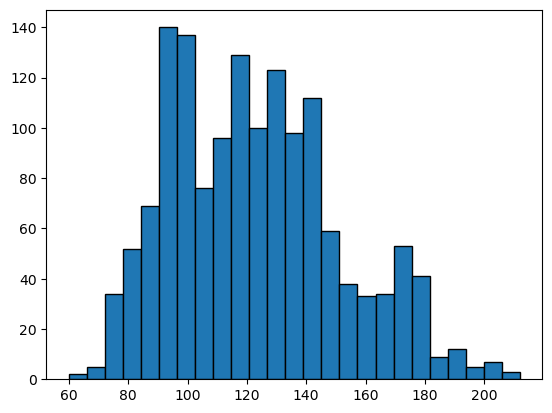

In [60]:
plt.hist(df_procesado["tempo"], edgecolor="black", bins=25);
plt.show()

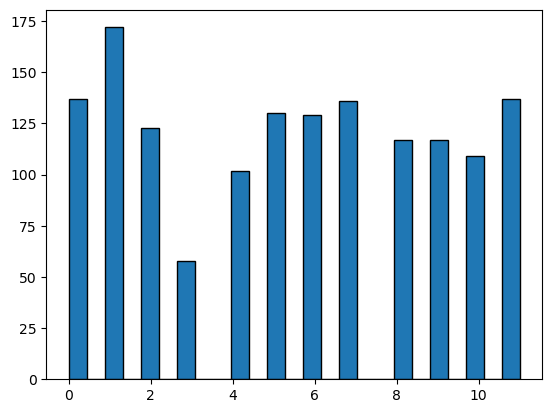

In [61]:
plt.hist(df_procesado["key"], edgecolor="black", bins=25);
plt.show()

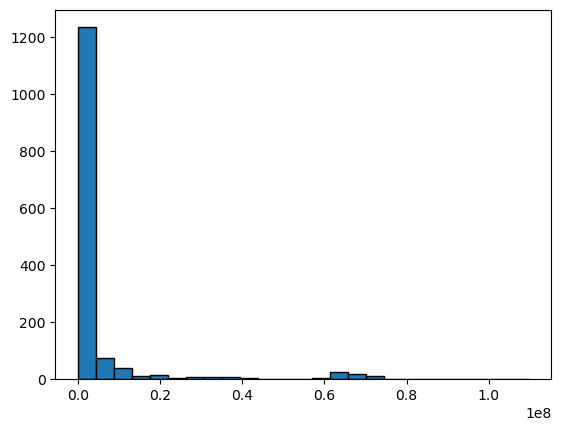

In [62]:
plt.hist(df_procesado["artist_followers"], edgecolor="black", bins=25);
plt.show()

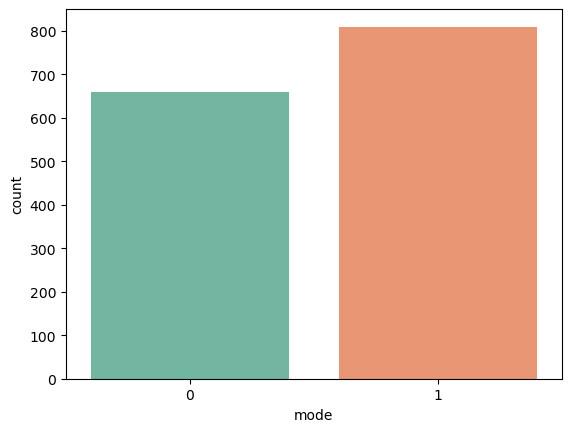

In [70]:
sns.countplot(x="mode", data=df_procesado, palette='Set2');
plt.show()

_**OJO**_: La distribución es en casi todas **no normal**. Ver si merece la pena transformarlas para mejores resultados en el modelo. Y por supuesto, escalar.  
Creo que sí que voy a transformar, al menos las que son claramente long tail o rarunas.

In [164]:
df_procesado.columns

Index(['album_name', 'artist', 'track_duration', 'track_name', 'popularity',
       'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'key',
       'mode', 'artist_genres', 'artist_followers', 'al_type_album',
       'al_type_single', 'exp_False', 'exp_True'],
      dtype='object')

In [166]:
corr_df = df_procesado[['track_duration',"popularity",'danceability','energy', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'loudness','tempo','key','mode','artist_followers',
                'al_type_album','al_type_single', 'exp_False', 'exp_True']]
corr_df

track_duration  popularity  danceability  energy  speechiness  \
0            156.943         100         0.714   0.472       0.0864   
1            200.690          97         0.637   0.643       0.0519   
2            239.359          95         0.561   0.520       0.2440   
3            162.637          97         0.835   0.679       0.0364   
4            175.238          97         0.561   0.965       0.0343   
...              ...         ...           ...     ...          ...   
1462         269.021          59         0.660   0.578       0.0306   
1463         200.000          59         0.742   0.662       0.0647   
1464         214.293          59         0.599   0.727       0.0783   
1465         217.729          56         0.534   0.752       0.1000   
1466         213.640          63         0.871   0.372       0.0413   

      acousticness  instrumentalness  liveness  valence  loudness    tempo  \
0          0.01300          0.000005    0.2660    0.238    -7.384  131.007   
1          0.13000          0.000002    0.1420    0.533    -6.645   96.888   
2          0.05030          0.000002    0.3550    0.424    -9.390  160.070   
3          0.58300          0.000002    0.2180    0.850    -5.329  124.980   
4          0.00383          0.000007    0.3710    0.304    -3.673  128.040   
...            ...               ...       ...      ...       ...      ...   
1462       0.45000          0.000089    0.1030    0.190    -8.591  127.092   
1463       0.57800          0.000000    0.1260    0.486    -4.651   84.006   
1464       0.66800          0.000026    0.1020    0.697    -4.894  167.979   
1465       0.60800          0.000006    0.0842    0.304    -6.093  170.205   
1466       0.25300          0.000002    0.1040    0.608    -5.713  109.987   

      key  mode  artist_followers  al_type_album  al_type_single  exp_False  \
0       2     1          21843485              0               1          1   
1       4     1          68253710              1               0          1   
2       4     0          72127776              1               0          0   
3       7     0          11522601              0               1          1   
4       7     0          25545911              0               1          0   
...   ...   ...               ...            ...             ...        ...   
1462    9     1            835904              0               1          1   
1463    5     1           2990388              0               1          1   
1464    4     1             47827              0               1          1   
1465    4     1            270876              0               1          1   
1466    0     0            161066              1               0          1   

      exp_True  
0            0  
1            0  
2            1  
3            0  
4            1  
...        ...  
1462         0  
1463         0  
1464         0  
1465         0  
1466         0  

[1467 rows x 18 columns]

Aquí tengo que mirar bien qué está pasando. El mega overfitting puede venir por aquí, mirarlo con cariño.

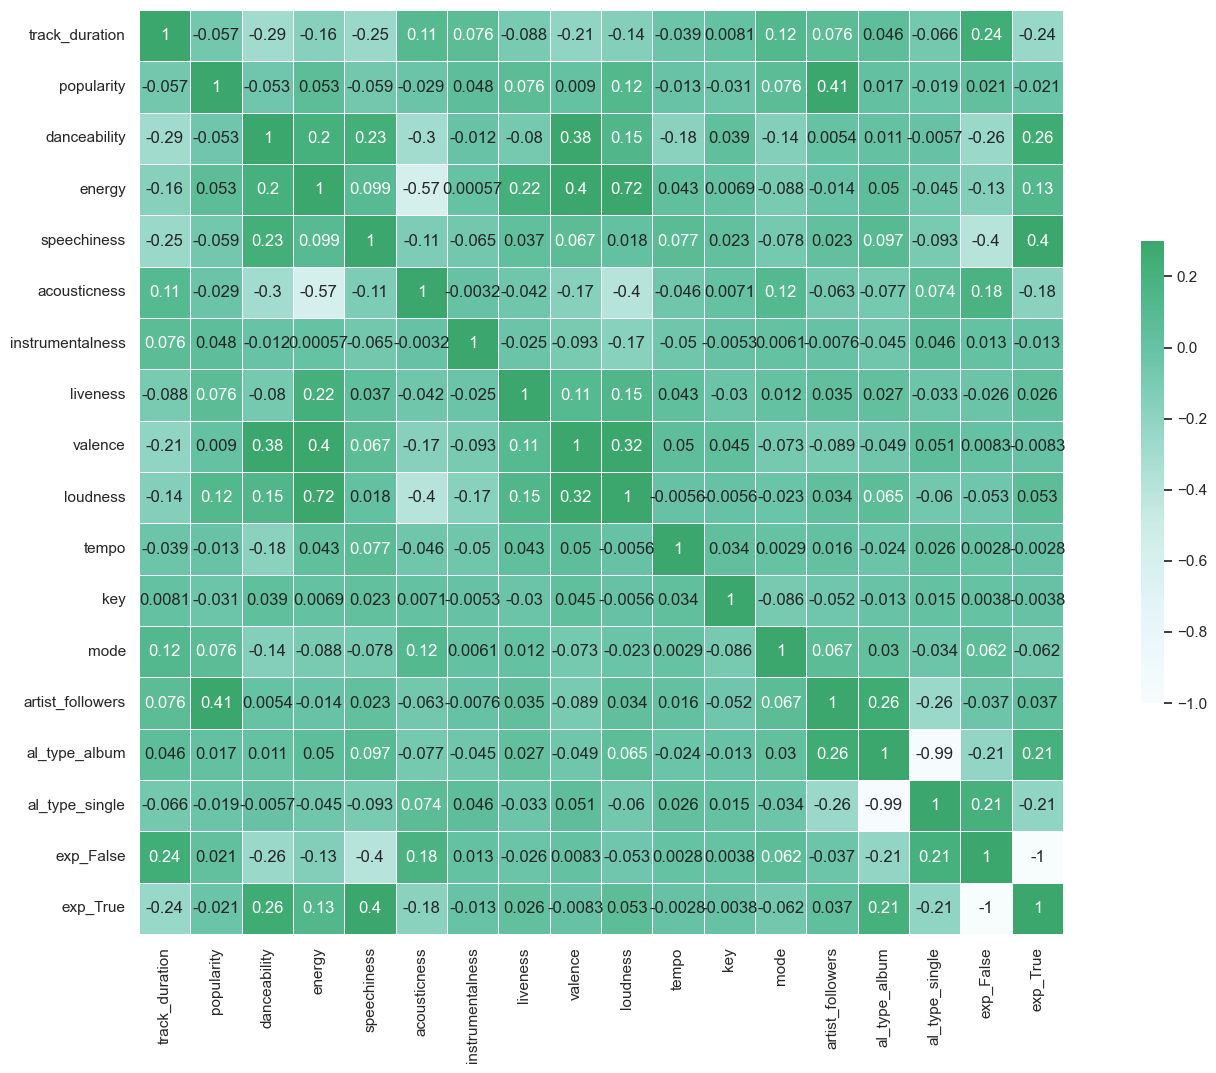

In [171]:
sns.set(color_codes=True)

mask = np.triu(np.ones_like(corr_df.corr(), dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20,12))
sns.heatmap(corr_df.corr(), cmap="BuGn", vmax=.3, center=0,
            annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.show()

- exp: eliminar una de las dos.  
- al_type: tb mucha correlación. Quizás era mejor elimnar single o album y dejar compilation.  
- 

## Escalamos variables
Escojo Min_Max porque devuelve valores entre 0 y 1.  
¿Se pueden mezclar scalers? Tiene pinta de que no.  

In [80]:
df_procesado.columns

Index(['album_name', 'artist', 'track_duration', 'track_name', 'popularity',
       'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'key',
       'mode', 'artist_genres', 'artist_followers', 'al_type_album',
       'al_type_single', 'exp_False', 'exp_True'],
      dtype='object')

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_escalar = [df_procesado.track_duration, df_procesado.popularity, df_procesado.loudness, df_procesado.tempo,
                df_procesado.artist_followers, df_procesado.key]

track_duration_sc = scaler.fit_transform(df_procesado[["track_duration"]])
popularity_sc = scaler.fit_transform(df_procesado[["popularity"]])
loudness_sc = scaler.fit_transform(df_procesado[["loudness"]])
tempo_sc = scaler.fit_transform(df_procesado[["tempo"]])
artis_followers_sc = scaler.fit_transform(df_procesado[["artist_followers"]])
key_sc = scaler.fit_transform(df_procesado[["key"]])

In [86]:
df_procesado_escalado = df_procesado[['album_name','al_type_album','al_type_single','artist','track_name',
                                      'exp_False','exp_True','danceability','energy','speechiness',
                                      'acousticness','instrumentalness','liveness','valence','mode','artist_genres',
                                      ]]

In [87]:
df_procesado_escalado["track_duration_sc"] = track_duration_sc
df_procesado_escalado["popularity_sc"] = popularity_sc
df_procesado_escalado["loudness_sc"] = loudness_sc
df_procesado_escalado["tempo_sc"] = tempo_sc
df_procesado_escalado["artis_followers_sc"] = artis_followers_sc
df_procesado_escalado["key_sc"] = key_sc

df_procesado_escalado

/var/folders/8w/q_1f6d1519b6rp401yzhh8v40000gn/T/ipykernel_47215/3657543364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado_escalado["track_duration_sc"] = track_duration_sc
/var/folders/8w/q_1f6d1519b6rp401yzhh8v40000gn/T/ipykernel_47215/3657543364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado_escalado["popularity_sc"] = popularity_sc
/var/folders/8w/q_1f6d1519b6rp401yzhh8v40000gn/T/ipykernel_47215/3657543364.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

album_name  al_type_album  al_type_single  \
0      Unholy (feat. Kim Petras)              0               1   
1                      Midnights              1               0   
2                       Her Loss              1               0   
3                     La Bachata              0               1   
4                I'm Good (Blue)              0               1   
...                          ...            ...             ...   
1462                   Thức Giấc              0               1   
1463                   Đi Về Nhà              0               1   
1464                     Mặt Mộc              0               1   
1465  Anh Đánh Rơi Người Yêu Này              0               1   
1466     girls like me don't cry              1               0   

                artist                  track_name  exp_False  exp_True  \
0            Sam Smith   Unholy (feat. Kim Petras)          1         0   
1         Taylor Swift                   Anti-Hero          1         0   
2                Drake                   Rich Flex          0         1   
3        Manuel Turizo                  La Bachata          1         0   
4         David Guetta             I'm Good (Blue)          0         1   
...                ...                         ...        ...       ...   
1462            Da LAB                   Thức Giấc          1         0   
1463               Đen                   Đi Về Nhà          1         0   
1464  Phạm Nguyên Ngọc                     Mặt Mộc          1         0   
1465            Andiez  Anh Đánh Rơi Người Yêu Này          1         0   
1466              thuy     girls like me don't cry          1         0   

      danceability  energy  speechiness  ...  liveness  valence  mode  \
0            0.714   0.472       0.0864  ...    0.2660    0.238     1   
1            0.637   0.643       0.0519  ...    0.1420    0.533     1   
2            0.561   0.520       0.2440  ...    0.3550    0.424     0   
3            0.835   0.679       0.0364  ...    0.2180    0.850     0   
4            0.561   0.965       0.0343  ...    0.3710    0.304     0   
...            ...     ...          ...  ...       ...      ...   ...   
1462         0.660   0.578       0.0306  ...    0.1030    0.190     1   
1463         0.742   0.662       0.0647  ...    0.1260    0.486     1   
1464         0.599   0.727       0.0783  ...    0.1020    0.697     1   
1465         0.534   0.752       0.1000  ...    0.0842    0.304     1   
1466         0.871   0.372       0.0413  ...    0.1040    0.608     0   

                                          artist_genres  track_duration_sc  \
0                                         [pop, uk pop]           0.145891   
1                                                 [pop]           0.225191   
2     [canadian hip hop, canadian pop, hip hop, rap,...           0.295287   
3     [colombian pop, latin pop, reggaeton, reggaeto...           0.156213   
4            [big room, dance pop, edm, pop, pop dance]           0.179055   
...                                                 ...                ...   
1462            [indie viet, v-pop, vietnamese hip hop]           0.349055   
1463  [indie viet, v-pop, vietnamese hip hop, vietna...           0.223941   
1464              [v-pop, vietnamese singer-songwriter]           0.249850   
1465              [v-pop, vietnamese singer-songwriter]           0.256078   
1466                        [chill r&b, indie r&b, pop]           0.248666   

     popularity_sc  loudness_sc  tempo_sc  artis_followers_sc    key_sc  
0         1.000000     0.737932  0.467157            0.199095  0.181818  
1         0.967391     0.765999  0.242684            0.622108  0.363636  
2         0.945652     0.661742  0.658366            0.657419  0.363636  
3         0.967391     0.815982  0.427505            0.105024  0.636364  
4         0.967391     0.878879  0.447637            0.232841  0.636364  
...            ...          ...       ...                 

## Hacemos clustering para ver cómo me agrupa

In [90]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [92]:
from sklearn.cluster import KMeans

X = df_procesado_escalado[['al_type_album','al_type_single','exp_False', 'exp_True','danceability', 'energy',
                           'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'mode',
                           'track_duration_sc', 'popularity_sc', 'loudness_sc','tempo_sc', 'artis_followers_sc',
                           'key_sc']]

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 8)]

inertias = [model.inertia_ for model in kmeans_per_k]

No sé por qué me está sacando doble cajitas. Arreglar.

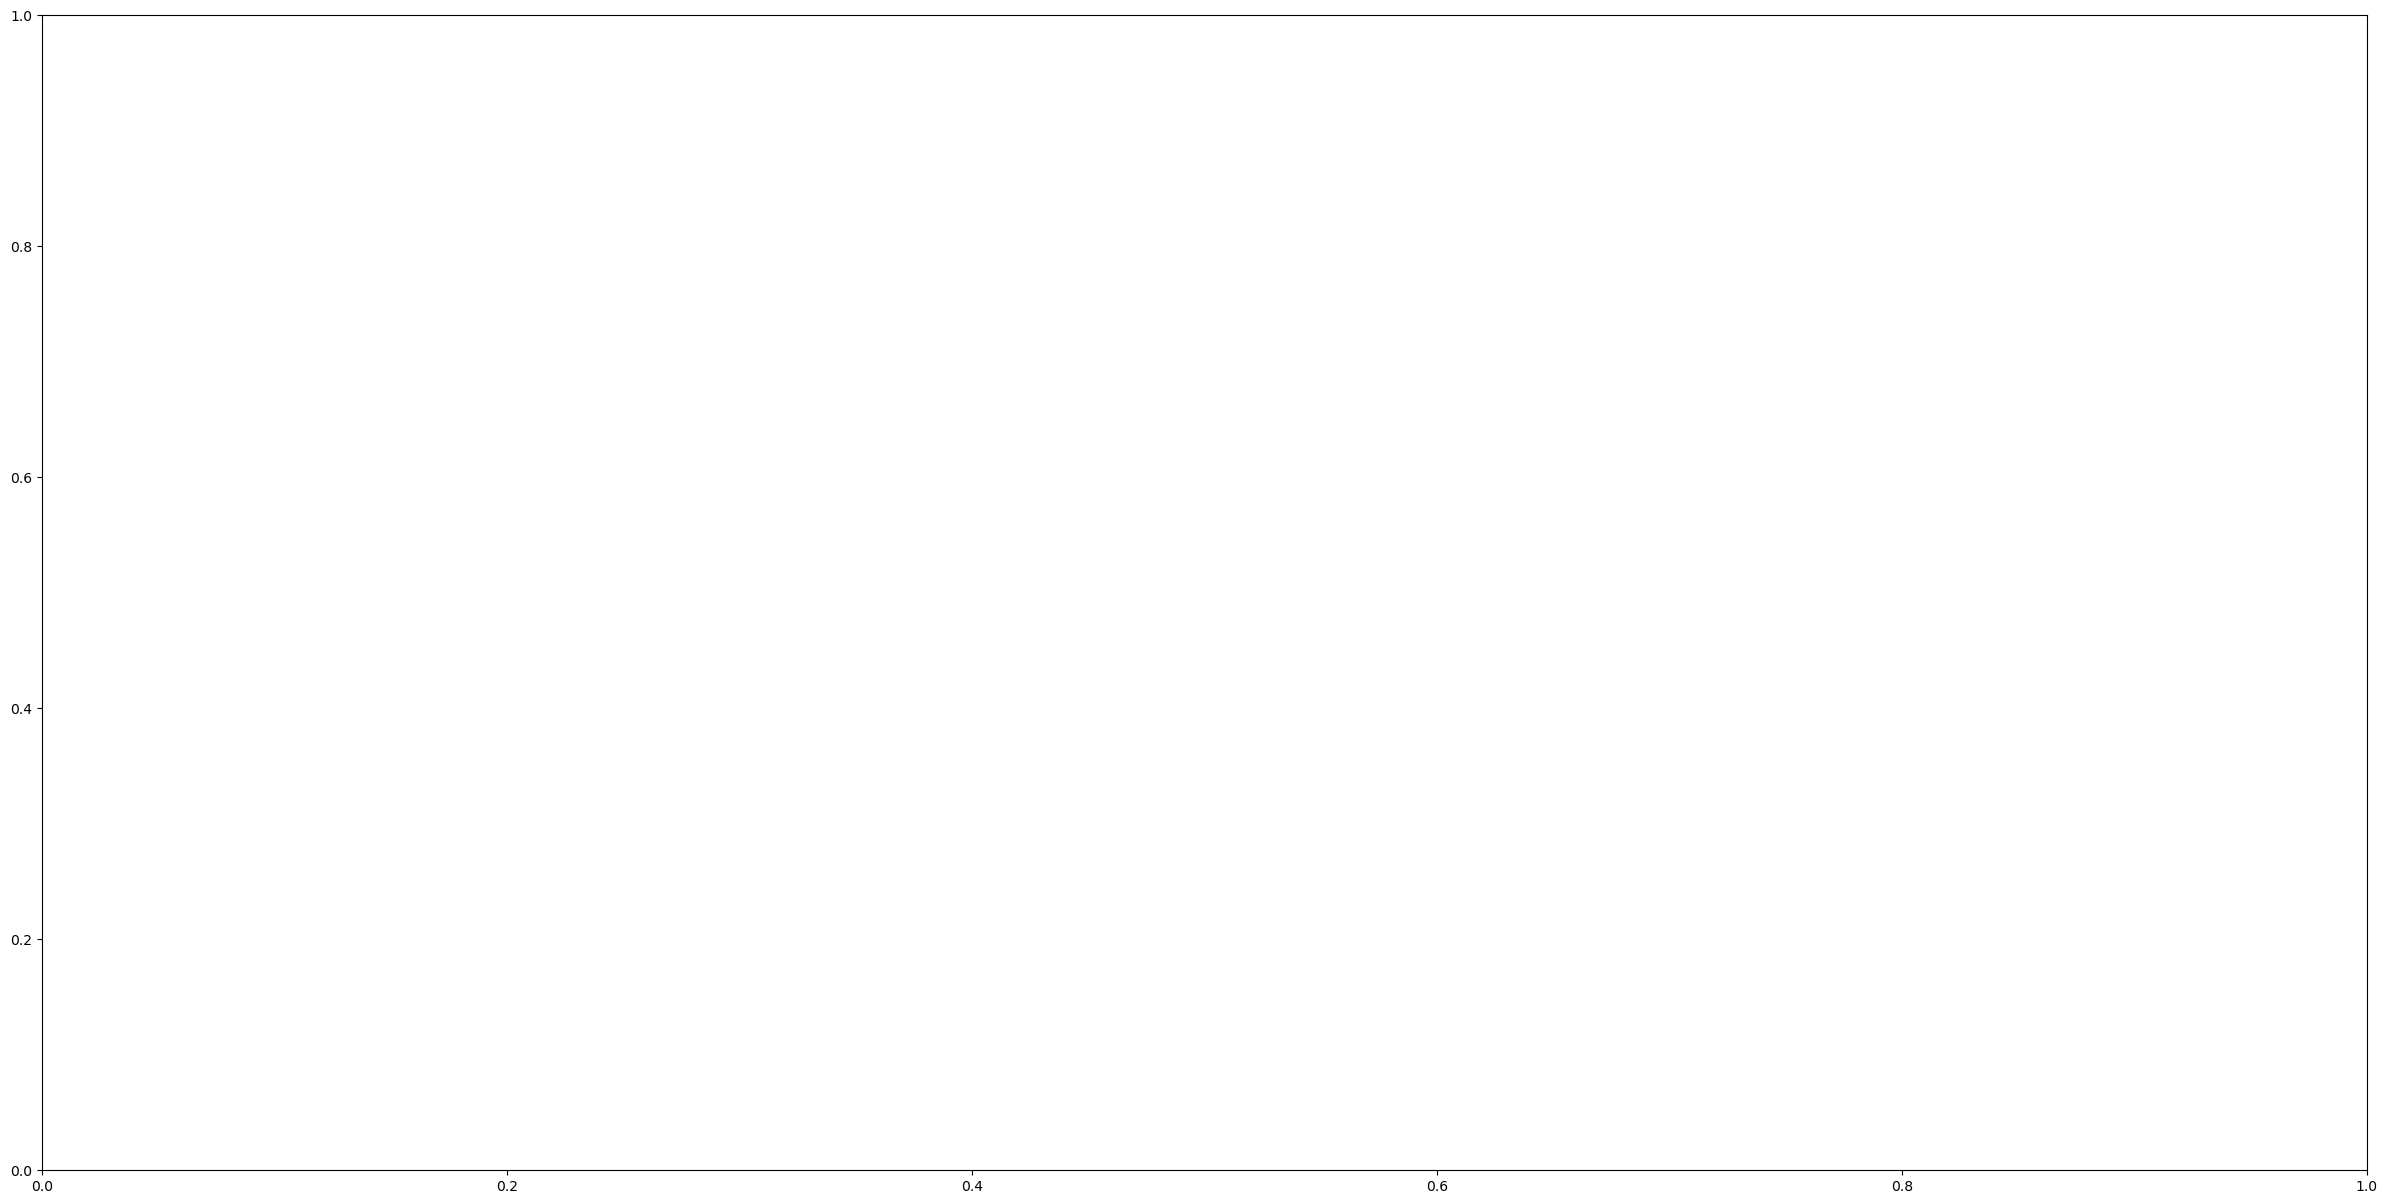

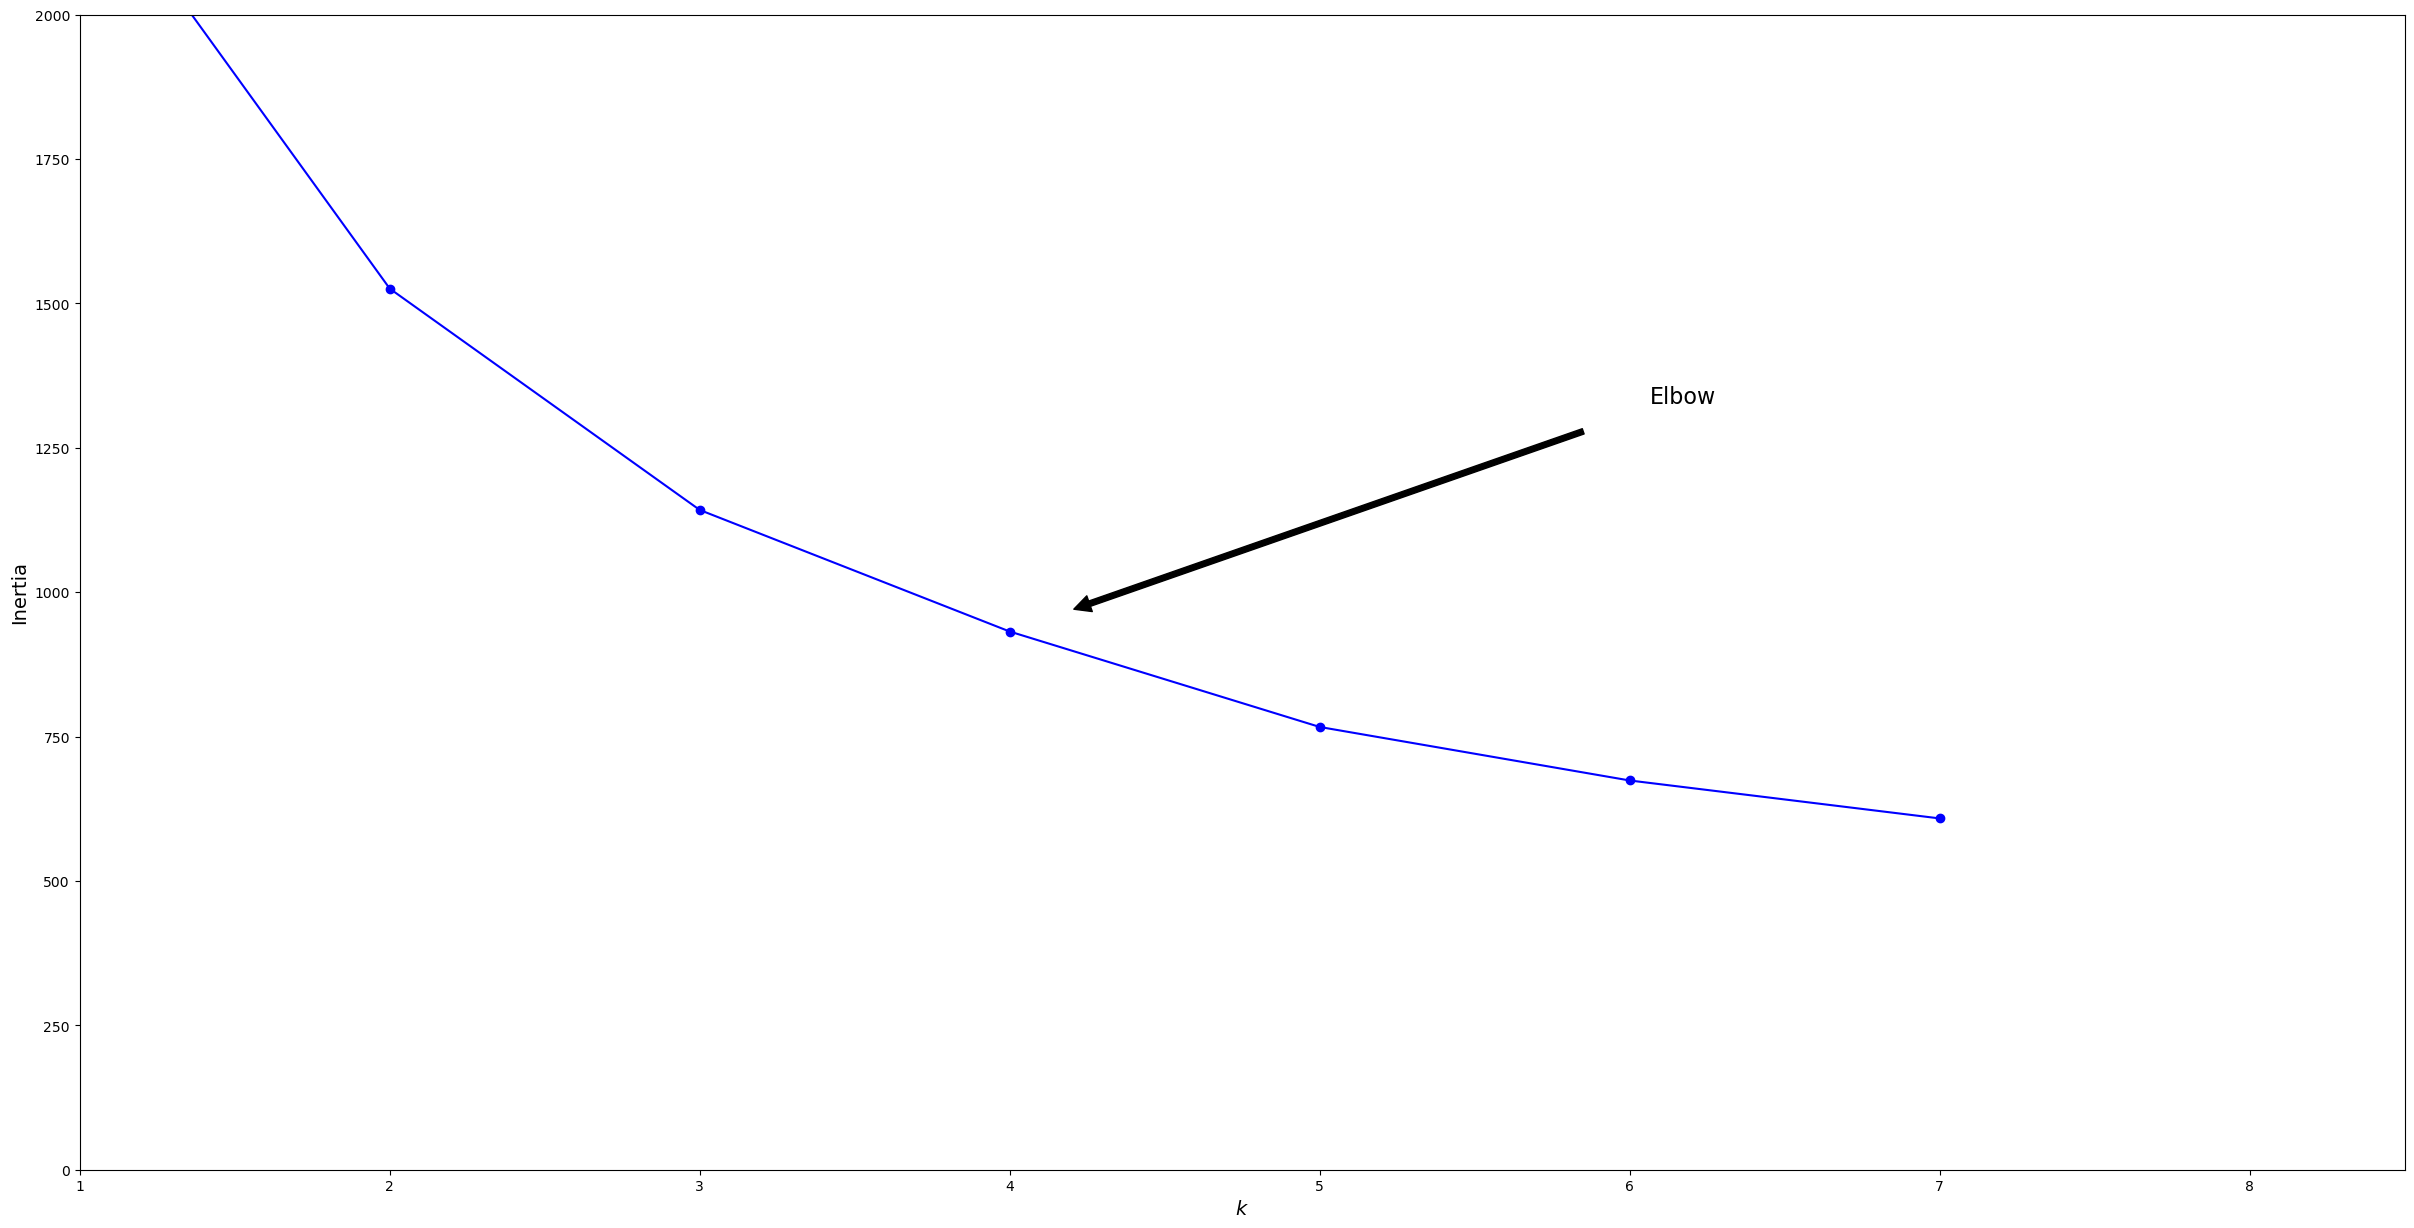

In [163]:
plt.figure(figsize=(30, 15))
plt.plot(range(1, 8), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 2000])
#save_fig("inertia_vs_k_plot")
plt.show();

In [103]:
plot_decision_boundaries(kmeans_per_k[3-1], X)
plt.show();

/opt/anaconda3/envs/general/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KMeans is expecting 18 features as input.

In [105]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

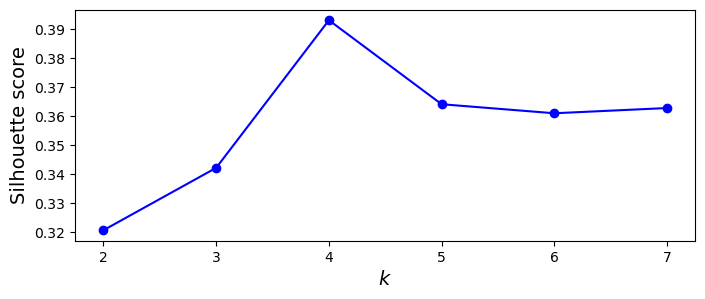

In [108]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 8), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show();

In [1]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show();

NameError: name 'plt' is not defined

## Modelo
Probamos con varios modelos, y con diferentes k

In [122]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_6 = KMeans(n_clusters=6, random_state=42)

y_pred4 = kmeans_4.fit_predict(X)
y_pred5 = kmeans_5.fit_predict(X)
y_pred6 = kmeans_6.fit_predict(X)

In [2]:
kmeans_4.labels_ is y_pred4
y_pred4

NameError: name 'kmeans_4' is not defined

### Primera prueba
Probamos con el clustering de kmeans_4. De momento ignoraré las variables con txt.

In [130]:
df_procesado_escalado1.columns

Index(['album_name', 'al_type_album', 'al_type_single', 'artist', 'track_name',
       'exp_False', 'exp_True', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode',
       'artist_genres', 'track_duration_sc', 'popularity_sc', 'loudness_sc',
       'tempo_sc', 'artis_followers_sc', 'key_sc', 'target'],
      dtype='object')

In [135]:
df_procesado_escalado1 = df_procesado_escalado
df_procesado_escalado1["target"] = y_pred4
X = df_procesado_escalado1[['al_type_album', 'al_type_single','exp_False', 'exp_True', 'danceability', 'energy',
                            'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'mode',
                            'track_duration_sc','popularity_sc','loudness_sc','tempo_sc','artis_followers_sc','key_sc']]
y = df_procesado_escalado1["target"]

In [127]:
y.value_counts(normalize=True) 

0    0.446489
1    0.258350
3    0.174506
2    0.120654
Name: target, dtype: float64

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape

((1173, 18), (294, 18))

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rnd_clf1 = RandomForestClassifier(n_estimators=100,max_features=3,random_state=42)

rnd_clf1.fit(X_train, y_train)

y_pred_rf1 = rnd_clf1.predict(X_test)
accuracy_score(y_test, y_pred_rf1)
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        51

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [159]:
import xgboost
from xgboost import XGBClassifier

xgb_clas1 = xgboost.XGBClassifier(n_estimators=100, eta=0.05, max_depth=2, min_child_weight=5,random_state=42)
xgb_clas1.fit(X_train, y_train)

y_pred_xgb1 = xgb_clas1.predict(X_test)
accuracy_score(y_test, y_pred_xgb1)
print(classification_report(y_test, y_pred_xgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        51

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [147]:
y_pred_xgb1

array([2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 2, 3, 1, 0, 3, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1,
       1, 3, 0, 2, 0, 0, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 3,
       0, 3, 0, 2, 3, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 3, 0, 3, 3, 0, 0,
       1, 3, 0, 0, 3, 1, 3, 3, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 0, 2, 3, 2, 0, 3, 1, 3, 1, 3, 2,
       0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 1, 1, 0, 3, 2, 2, 0, 1, 0, 0, 1, 3,
       1, 2, 2, 0, 0, 1, 1, 3, 0, 2, 0, 3, 1, 1, 0, 3, 0, 1, 1, 3, 0, 3,
       0, 0, 1, 0, 3, 1, 1, 0, 1, 1, 3, 3, 0, 1, 0, 0, 2, 2, 0, 0, 0, 3,
       0, 1, 0, 1, 0, 0, 2, 3, 0, 0, 1, 1, 0, 3, 0, 2, 2, 3, 3, 0, 1, 3,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 0,
       0, 3, 1, 0, 2, 3, 0, 0, 1, 2, 3, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 3, 1, 0, 1, 1, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 3, 0,
       0, 1, 3, 0, 1, 2, 3, 1])

In [148]:
y_pred_rf1

array([2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 2, 3, 1, 0, 3, 0, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1,
       1, 3, 0, 2, 0, 0, 0, 0, 3, 2, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 3,
       0, 3, 0, 2, 3, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 3, 0, 3, 3, 0, 0,
       1, 3, 0, 0, 3, 1, 3, 3, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 3, 0, 0, 0, 2, 3, 2, 0, 3, 1, 3, 1, 3, 2,
       0, 0, 0, 1, 0, 0, 2, 1, 3, 0, 1, 1, 0, 3, 2, 2, 0, 1, 0, 0, 1, 3,
       1, 2, 2, 0, 0, 1, 1, 3, 0, 2, 0, 3, 1, 1, 0, 3, 0, 1, 1, 3, 0, 3,
       0, 0, 1, 0, 3, 1, 1, 0, 1, 1, 3, 3, 0, 1, 0, 0, 2, 2, 0, 0, 0, 3,
       0, 1, 0, 1, 0, 0, 2, 3, 0, 0, 1, 1, 0, 3, 0, 2, 2, 3, 3, 0, 1, 3,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 0,
       0, 3, 1, 0, 2, 3, 0, 0, 1, 2, 3, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 3, 1, 0, 1, 1, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 3, 0,
       0, 1, 3, 0, 1, 2, 3, 1], dtype=int32)

### Segunda prueba
Probamos con el clustering de kmeans_5.

In [158]:
y_pred5

array([1, 0, 2, ..., 1, 1, 0], dtype=int32)

In [150]:
df_procesado_escalado2 = df_procesado_escalado
df_procesado_escalado2["target"] = y_pred5

X2 = df_procesado_escalado2[['al_type_album', 'al_type_single','exp_False', 'exp_True', 'danceability', 'energy',
                            'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'mode',
                            'track_duration_sc','popularity_sc','loudness_sc','tempo_sc','artis_followers_sc','key_sc']]
y2 = df_procesado_escalado2["target"]

In [151]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42,stratify=y)
X_train2.shape, X_test2.shape

((1173, 18), (294, 18))

In [157]:
# Entrenamos modelos
rnd_clf2 = RandomForestClassifier(n_estimators=80,max_features=3,random_state=42)

rnd_clf2.fit(X_train2, y_train2)

y_pred_rf2 = rnd_clf2.predict(X_test2)
accuracy_score(y_test, y_pred_rf2)
print(classification_report(y_test2, y_pred_rf2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        59

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [161]:
xgb_clas2 = xgboost.XGBClassifier(n_estimators=100, eta=0.5, max_depth=2, min_child_weight=5,random_state=42)
xgb_clas2.fit(X_train2, y_train2)

y_pred_xgb2 = xgb_clas2.predict(X_test2)
accuracy_score(y_test2, y_pred_xgb2)
print(classification_report(y_test2, y_pred_xgb2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        59

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

